# Task- 02 Supervised Machine Learning
By,Divyansh Singhal

This task is based on Predicting the score of a student based on His/Her no.of Learning Hours.

In [21]:
# Importing all libraries required in this notebook
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Importing Data from te given Dataset URL

In [2]:
df=pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

In [3]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [23]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Exploratory Data Analysis

In [22]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

data visualizattion


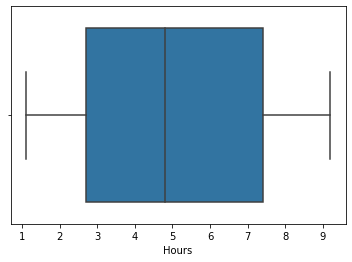

In [7]:
#check for outliers
sns.boxplot(x=df["Hours"])

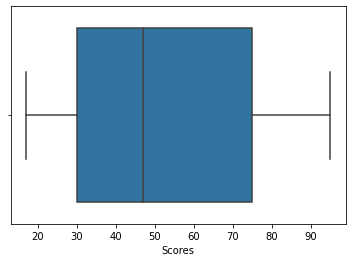

In [24]:
sns.boxplot(x=df["Scores"])

# 2-D Plotting Of Scores

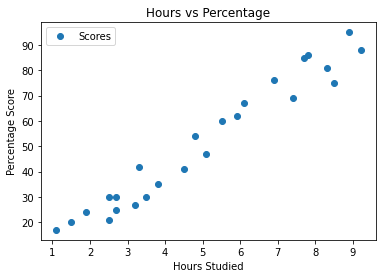

In [9]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

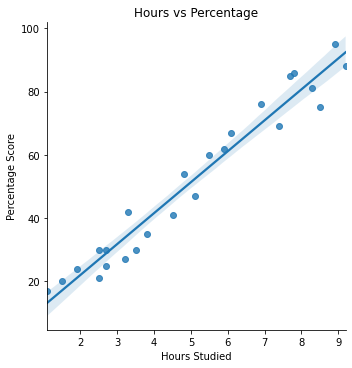

In [10]:
sns.lmplot(x="Hours", y="Scores",data=df)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

# spitting train and test data

In [25]:
from sklearn.model_selection import train_test_split  
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 


# Training Algorithm


In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [13]:
# The coefficients
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.018160041434683


# Plotting Of Regression Line


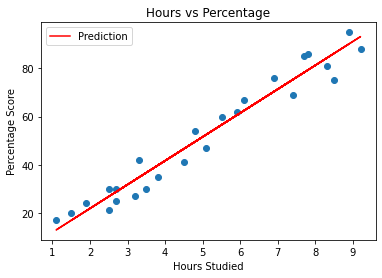

In [26]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,'r',label='Prediction');
plt.legend(loc=2)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Hours vs Percentage')
plt.show()

# Prediction

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [16]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({ 'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# Accuracy

In [17]:
print("Residual sum of squares: %.2f"
      % np.mean((y_pred - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Residual sum of squares: 21.60
Variance score: 0.95


In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

print("Residual sum of squares (MSE): %.2f" % np.mean((y_test-y_pred) ** 2))


Mean Absolute Error: 4.183859899002975
Residual sum of squares (MSE): 21.60


# Plotting Of Regression Line


In [19]:
# You can also test with your own data
hours = float(input())
score=(hours*regressor.coef_) + regressor.intercept_
#own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score))

9.25
No of Hours = 9.25
Predicted Score = [93.69173249]
